# Neural Networks Library

In [135]:
import numpy as np
import nnfs
import matplotlib.pyplot as plt
from library import *
from nnfs.datasets import spiral_data, vertical_data
nnfs.init()

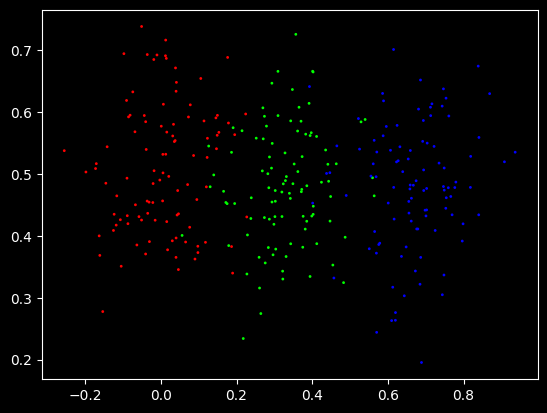

In [136]:
X, y = vertical_data(samples = 100, classes = 3)
y = np.eye(3)[y]

plt.style.use('dark_background')
plt.scatter(X[:,0], X[:,1], c=y, s=1)
plt.show()

In [137]:
def predict(NN, name = "Neural Network", intensity = 130, area:list[tuple[int]] = [(np.amin(X[:,0])-0.05,np.amax(X[:,0])+0.05),(np.amin(X[:,1])-0.05,np.amax(X[:,1])+0.05)]):
    plt.title(name)
    plt.style.use('dark_background')
    x1, x2 = area[0]
    y1,y2 = area[1]
    predX = []
    n=intensity
    for i in range (int(n * (x2-x1))):
        for j in range (int(n * (y2-y1))):
            predX.append(np.array([i/n+x1,j/n+y1]))
    predX = np.array(predX)

    output = Softmax().run(NN.run(predX))
    plt.scatter(predX[:,0], predX[:,1], c=output, s=80, alpha=0.05)
    X, y = vertical_data(samples = 200, classes = 3)
    y = np.eye(3)[y]
    plt.scatter(X[:,0], X[:,1], c=y, s=1)
    plt.show()

In [138]:
myNN = Network(Softmax_and_CategoricalCrossEntropy(), SGD())
myNN.addLayer(Layer_Dense(2, 64, ReLU()))
myNN.addLayer(Layer_Dense(64, 64, ReLU()))
myNN.addLayer(Layer_Dense(64, 3, None))

print(myNN.run(np.array([3,1])))
myNN.run(X)
print("Loss:\t"+ str(myNN.calcLoss(y)))
print("Accuracy:\t"+ str(myNN.calcAccuracy(y)))

[[1.6497087e-04 1.1170932e-04 4.0800605e-06]]
Loss:	1.0986139
Accuracy:	0.09666666666666666


In [139]:
X, y = vertical_data(samples = 100, classes = 3)


Loss:	1.0986139


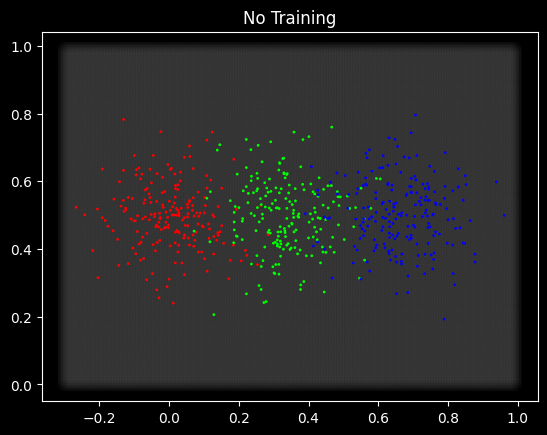

In [140]:
output = myNN.run(X)
print("Loss:\t"+str(myNN.calcLoss(y)))
predict(myNN,"No Training", area = [(-0.3,1),(0,1)])

epoche: 0, acc: 0.130, loss: 2.723
epoche: 1000, acc: 0.940, loss: 0.625
epoche: 2000, acc: 0.937, loss: 0.617
ACC:	0.9366666666666666
Loss:	0.617


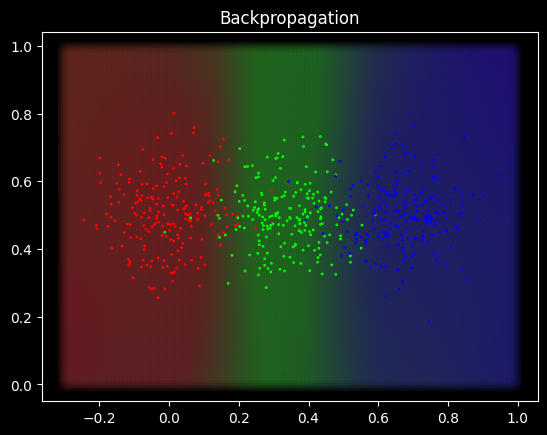

In [150]:
myNN.run(X)
myNN.optimize(X,y,2001, 1000,0.1)
myNN.run(X)
print("ACC:\t"+str(myNN.calcAccuracy(y)))
print(f"Loss:\t{myNN.calcLoss(y):.3f}")

predict(myNN, "Backpropagation", area = [(-0.3,1),(0,1)])


New optimal found: 	0.15456124
New optimal found: 	0.15317635
New optimal found: 	0.15224496
New optimal found: 	0.15010351
New optimal found: 	0.1497188
New optimal found: 	0.14870724
New optimal found: 	0.14816087
New optimal found: 	0.14512707
New optimal found: 	0.14508687
New optimal found: 	0.14488937
New optimal found: 	0.1437158
New optimal found: 	0.14293171
New optimal found: 	0.14251436
New optimal found: 	0.14248051
New optimal found: 	0.14206673
New optimal found: 	0.14116752
New optimal found: 	0.13967784
New optimal found: 	0.13912643
New optimal found: 	0.13668494
New optimal found: 	0.13633192
New optimal found: 	0.13490559
New optimal found: 	0.13428742
New optimal found: 	0.13342248
New optimal found: 	0.13270801
ACC:	0.9333333333333333
0.13270801


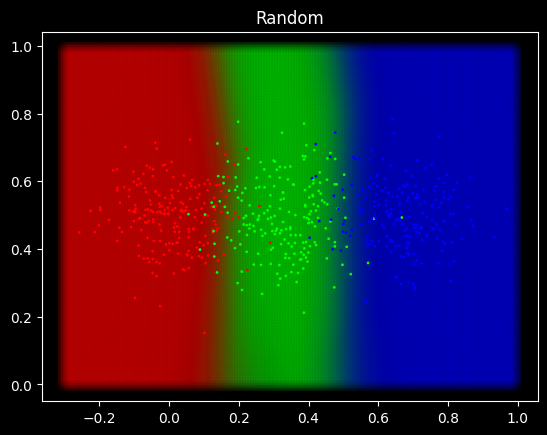

In [152]:
myNN.optimizeRandomly(500, 0.02, X, y)
output = myNN(X)
print("ACC:\t"+str(myNN.calcAccuracy(y)))
print(myNN.calcLoss(y))

predict(myNN,"Random", area = [(-0.3,1),(0,1)])